# ✅ Gerekli kütüphaneleri içe aktarıyoruz

In [3]:
import numpy as np  # Sayısal işlemler için temel kütüphane

# TensorFlow ve Keras kütüphanelerinden modeller, katmanlar ve optimizer'ları yüklüyoruz
from tensorflow.keras.datasets import fashion_mnist  # Fashion MNIST veri seti
from tensorflow.keras.models import Model  # Keras'ta model oluşturmak için temel sınıf
from tensorflow.keras.layers import Dense, Input  # Katmanlar (Dense = tam bağlantılı, Input = giriş)
from tensorflow.keras.optimizers import Adam  # Optimizasyon algoritması olarak Adam kullanıyoruz

# Yapısal benzerlik (SSIM) hesaplamak için skimage kütüphanesinden metrik fonksiyonu yüklüyoruz
# Not: Gerekirse "!pip install scikit-image" komutu ile yüklenebilir
from skimage.metrics import structural_similarity as ssim  # Görsel kalite ölçümü için SSIM metriği

# Görüntüleri göstermek için matplotlib kullanıyoruz
import matplotlib.pyplot as plt


# Uyarıları atlatmak için warnings kütüphanesi
import warnings
warnings.filterwarnings("ignore")  # Konsolda gereksiz uyarı mesajlarını engeller

# 📥 Veri Setini Yükleme ve Ön İşleme

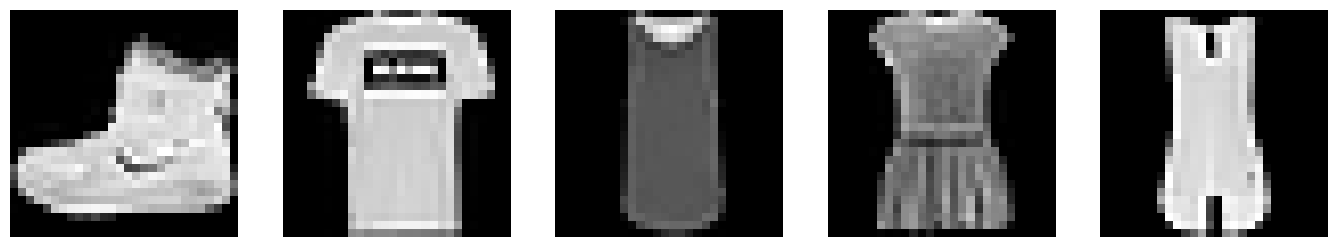

In [4]:
# Fashion MNIST veri setini yüklüyoruz (etiketler kullanılmayacağı için '_' ile atlanıyor)
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# Görüntü verilerini float32 formatına çevirip 0-1 arasına normalize ediyoruz
X_train = X_train.astype("float32") / 255.0  # Eğitim verisi normalizasyonu
X_test = X_test.astype("float32") / 255.0    # Test verisi normalizasyonu

# Eğitim verisinden 5 örnek görüntü gösteriyoruz (gri tonlamalı)
plt.figure(figsize = (17,7))
for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 satır, 5 sütunluk gridde görselleri yerleştiriyoruz
    plt.imshow(X_train[i], cmap = "gray")  # Görselleri gri tonlamalı olarak gösteriyoruz
    plt.axis("off")  # Eksen çizgilerini kaldırıyoruz
plt.show()  # Görselleri gösteriyoruz

# Model girişi için görüntüleri 28x28 = 784 boyutunda düz vektör haline getiriyoruz
X_train = X_train.reshape(-1, 28 * 28)  # Eğitim verisini 2D tensordan 1D vektöre dönüştür
X_test = X_test.reshape(-1, 28 * 28)    # Test verisi için de aynı işlem

# 🧠 Autoencoder Mimarisi ve Model Eğitimi

In [5]:
input_dim = X_train.shape[1]  # Girdi boyutu (28x28 = 784)
encoding_dim = 64             # Sıkıştırılmış kod boyutu (latent space)

# 🏗️ Encoder Katmanı
input_image = Input(shape=(input_dim,))                            # Girdi katmanı
encoded = Dense(512, activation="relu")(input_image)               # 1. gizli katman
encoded = Dense(256, activation="relu")(encoded)                   # 2. gizli katman
encoded = Dense(128, activation="relu")(encoded)                   # 3. gizli katman
encoded = Dense(encoding_dim, activation="relu")(encoded)          # Kodlama (latent) katmanı

# 🛠️ Decoder Katmanı
decoded = Dense(128, activation="relu")(encoded)                   # 1. genişletme katmanı
decoded = Dense(256, activation="relu")(decoded)                   # 2. genişletme katmanı
decoded = Dense(512, activation="relu")(decoded)                   # 3. genişletme katmanı
decoded = Dense(input_dim, activation="sigmoid")(decoded)          # Çıktı katmanı (784 boyut)

# 🔗 Encoder + Decoder birleştirilerek Autoencoder modeli oluşturuluyor
autoencoder = Model(input_image, decoded)

# ⚙️ Model derleniyor
autoencoder.compile(optimizer=Adam(), loss="binary_crossentropy")

# 📈 Model eğitimi başlatılıyor
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, X_test),
    verbose=1
)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 0.3638 - val_loss: 0.2966
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.2928 - val_loss: 0.2885
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.2854 - val_loss: 0.2838
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.2806 - val_loss: 0.2809
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 0.2778 - val_loss: 0.2803
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - loss: 0.2757 - val_loss: 0.2773
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 0.2749 - val_loss: 0.2770
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.2729 - val_loss: 0.2749
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.2718 - val_loss: 0.2743
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.2715 - val_loss: 0.2738
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.2705 - val_loss: 0.2727
Epoch 12/50
938/938 ━━━━━━━━━━

# 🧠 Encoder ve Decoder Modellerinin Tanımlanması

In [6]:
# 🔐 Eğitimli encoder modelini oluşturuyoruz
# Bu model, orijinal görüntüyü latent (sıkıştırılmış) temsile dönüştürür
encoder = Model(input_image, encoded)

# 🔓 Latent temsili alacak yeni bir input tanımlıyoruz
encoded_input = Input(shape=(encoding_dim,))

# Autoencoder'dan eğitimli decoder katmanlarını sırayla çekiyoruz:
decoder_layer1 = autoencoder.layers[-4](encoded_input)   # 1. genişletme (128 → 256)
decoder_layer2 = autoencoder.layers[-3](decoder_layer1)  # 2. genişletme (256 → 512)
decoder_layer3 = autoencoder.layers[-2](decoder_layer2)  # 3. genişletme (512 → tekrar 512)
decoder_output = autoencoder.layers[-1](decoder_layer3)  # Çıktı katmanı (512 → 784)

# Decoder modelini oluşturuyoruz
# Bu model, latent temsilden orijinal boyuttaki görüntüyü üretir
decoder = Model(encoded_input, decoder_output)

# 🧬 Encoder ile test verisinden latent temsiller elde ediyoruz
encoded_images = encoder.predict(X_test)

# 🔁 Decoder ile bu latent temsilleri tekrar orijinal görüntü formatına döndürüyoruz
decoded_images = decoder.predict(encoded_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


# 📊 Görsel Benzerlik Ölçümü: SSIM Skoru Hesaplama

In [7]:
def compute_ssim(original, reconstructed):
    """
    Her iki görüntü arasında SSIM (Structural Similarity Index) skorunu hesaplar.
    SSIM skoru 0 ile 1 arasında bir değerdir. 1, iki görüntünün tamamen aynı olduğunu belirtir.
    """
    original = original.reshape(28, 28)           # Görüntüyü 28x28 boyutuna getir
    reconstructed = reconstructed.reshape(28, 28) # Yeniden oluşturulmuş görüntüyü de aynı şekilde yeniden şekillendir
    return ssim(original, reconstructed, data_range=1)  # SSIM hesaplanırken değer aralığı [0,1]

# Tüm örnekler için SSIM skorlarını tutmak için bir liste oluşturuyoruz
ssim_score = []

# İlk 100 test görüntüsü için SSIM skorlarını hesaplıyoruz
for i in range(100):
    original_img = X_test[i]                # Gerçek test görüntüsü
    reconstructed_img = decoded_images[i]   # Autoencoder tarafından üretilmiş görüntü
    score = compute_ssim(original_img, reconstructed_img)  # SSIM skorunu hesaplıyoruz
    ssim_score.append(score)                # Listeye ekle

# Ortalama SSIM skorunu hesaplıyoruz
average_ssim = np.mean(ssim_score)

# Sonucu yazdırıyoruz
print(average_ssim)

0.8216836726724953


# 🖼️ Görsel Karşılaştırma: Orijinal ve Üretilen Görüntüler

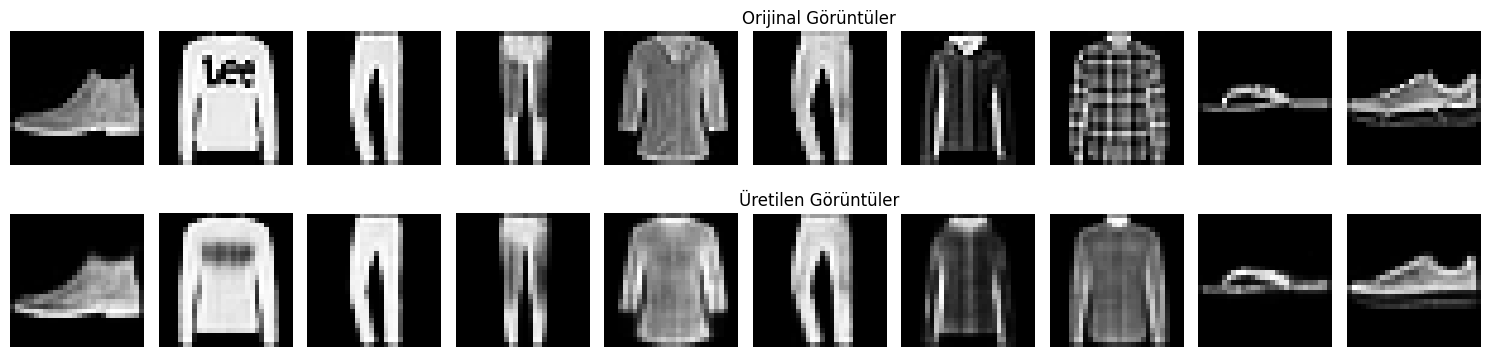

In [8]:
import matplotlib.pyplot as plt

n = 10  # Görselleştirme için kullanılacak görüntü sayısı

# 2 satır (üst: orijinal, alt: üretilen) ve n sütunluk bir görsel alan oluşturuyoruz
fig, ax = plt.subplots(2, n, figsize=(15, 4))

for i in range(n):
    # Üst sıraya orijinal (test verisindeki) görüntüyü yerleştiriyoruz
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')  # 28x28 boyutunda göster
    ax[0, i].axis('off')  # Eksenleri gizle
    if i == n // 2:
        ax[0, i].set_title('Orijinal Görüntüler')  # Ortadaki resme başlık ekle

    # Alt sıraya modelin ürettiği görüntüyü yerleştiriyoruz
    ax[1, i].imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    ax[1, i].axis('off')
    if i == n // 2:
        ax[1, i].set_title('Üretilen Görüntüler')  # Ortadaki resme başlık ekle

plt.tight_layout()  # Sıkıştırılmış düzen (kenarlara taşmayı engeller)
plt.show()  # Görselleri ekrana getir